# Churn Rate Prediction Model

The dataset contains E Commerce Data of Customers and if te customer Churned

Dataset Source - Interview with a company

## Independent Variables:

- Categorical Variable
    - PreferredLoginDevice
    - PreferredPaymentMode
    - PreferedOrderCat

- Binary Categorical Variable
    - Gender
    - MaritalStatus
    - Complain

- Numeric Varaiable    
    - Tenure
    - WarehouseToHome 
    - HourSpendOnApp
    - NumberOfDeviceRegistered (Low)
    - CityTier (Low)
    - SatisfactionScore
    - NumberOfAddress (Low)
    - OrderAmountHikeFromlastYear
    - CouponUsed (Low)
    - OrderCount
    - DaySinceLastOrder
    - CashbackAmount

## Dependent Variable:

    Churn Flag

## Selected Variables

- Categorical Variable

    - MaritalStatus
    - Complain

- Numeric Varaiable   
    - Tenure - 3 
    - WarehouseToHome - 8


# ML Algorithm used:

    Logistic Classification


## Takeaways-

1. Lower the tenure higher is the rate of churn, which means, the more time it spends on the platform, less likely he is to churn.
2. Higher is the distance from warehouse to home, the lesser is the rate of churn.
3. Single people are more likely to churn than the Married ones.
4. People who have registered complains are more likely to churn.
5. People buying in Categories - Mobile Phaone and Laptops are more likely to churn.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datatile.summary.df import DataFrameSummary
import seaborn as sns

In [2]:
df_raw_data = pd.read_excel("E Commerce Dataset.xlsx", sheet_name="E Comm")

In [3]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [4]:
df_raw_data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [5]:
sum(df_raw_data['Churn']==1)/df_raw_data.shape[0]

0.16838365896980462

In [6]:
def calculate_null_percentage(dataframe):
    total_rows = len(dataframe)
    null_percentages = (dataframe.isnull().sum() / total_rows) * 100
    null_percentage_df = pd.DataFrame({
        'Column': null_percentages.index,
        'Null Percentage': null_percentages.values
    })
    return null_percentage_df

In [7]:
null_percentage_result = calculate_null_percentage(df_raw_data)
print(null_percentage_result)

                         Column  Null Percentage
0                    CustomerID         0.000000
1                         Churn         0.000000
2                        Tenure         4.689165
3          PreferredLoginDevice         0.000000
4                      CityTier         0.000000
5               WarehouseToHome         4.458259
6          PreferredPaymentMode         0.000000
7                        Gender         0.000000
8                HourSpendOnApp         4.529307
9      NumberOfDeviceRegistered         0.000000
10             PreferedOrderCat         0.000000
11            SatisfactionScore         0.000000
12                MaritalStatus         0.000000
13              NumberOfAddress         0.000000
14                     Complain         0.000000
15  OrderAmountHikeFromlastYear         4.706927
16                   CouponUsed         4.547069
17                   OrderCount         4.582593
18            DaySinceLastOrder         5.452931
19               Cas

In [8]:
df_cleaned = df_raw_data.dropna()


In [9]:
df_cleaned.shape

(3774, 20)

In [11]:
categorical_vars = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'Gender', 
           'MaritalStatus']

numerical_vars = [
    'Tenure',
    'WarehouseToHome',
    'HourSpendOnApp',
    'NumberOfDeviceRegistered',
    'CityTier',
    'SatisfactionScore',
    'NumberOfAddress',
    'OrderAmountHikeFromlastYear',
    'CouponUsed',
    'OrderCount',
    'DaySinceLastOrder',
    'CashbackAmount'
]

target = "Churn"

In [12]:
df_cleaned[categorical_vars]

,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,Gender,MaritalStatus
0,Mobile Phone,Debit Card,Laptop & Accessory,Female,Single
3,Phone,Debit Card,Laptop & Accessory,Male,Single
5,Computer,Debit Card,Mobile Phone,Female,Single
11,Mobile Phone,Debit Card,Fashion,Male,Single
12,Phone,COD,Mobile,Male,Single
...,...,...,...,...,...
5624,Mobile Phone,UPI,Mobile Phone,Female,Single
5625,Computer,Credit Card,Laptop & Accessory,Male,Married
5627,Mobile Phone,Debit Card,Laptop & Accessory,Male,Married
5628,Computer,Credit Card,Laptop & Accessory,Male,Married


In [13]:
def generate_class_table(dataframe, target_column, cat_var):
    rows = []

    for column in cat_var:
        classes = dataframe[column].value_counts()
        total_count = classes.sum()
        percentages = (classes / total_count) * 100

        y_counts = dataframe[dataframe[target_column] == 1][column].value_counts()
        y_percentage = (y_counts / total_count) * 100

        for class_value, count, percentage, y_percent in zip(classes.index, classes.values, percentages.values, y_percentage.values):
            rows.append({
                'Column Name': column,
                'Classes': class_value,
                'Count': count,
                'Percentage': round(percentage, 2),
                'Y Percentage': round(y_percent, 2)
            })

    class_table = pd.DataFrame(rows, columns=['Column Name', 'Classes', 'Count', 'Percentage', 'Y Percentage'])
    return class_table


def visualize_numerical_variables(dataframe, numerical_vars):
    for var in numerical_vars:
        # Create a new figure with subplots
        plt.figure(figsize=(12, 4))

        # Plot Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(dataframe[var], kde=True)
        plt.title(f'Histogram of {var}')

        # Plot Box Plot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=dataframe[var])
        plt.title(f'Box Plot of {var}')

        # Adjust layout
        plt.tight_layout()

        # Show the plots
        plt.show()

In [14]:
summary_1 = generate_class_table(df_cleaned,"Churn", categorical_vars)
summary_1

,Column Name,Classes,Count,Percentage,Y Percentage
0,PreferredLoginDevice,Mobile Phone,1936,51.30,7.10
1,PreferredLoginDevice,Computer,1111,29.44,5.62
2,PreferredLoginDevice,Phone,727,19.26,4.00
3,PreferredPaymentMode,Debit Card,1538,40.75,6.09
4,PreferredPaymentMode,Credit Card,1124,29.78,4.48
5,PreferredPaymentMode,E wallet,443,11.74,2.49
6,PreferredPaymentMode,COD,301,7.98,1.93
7,PreferredPaymentMode,UPI,285,7.55,1.27
8,PreferredPaymentMode,Cash on Delivery,48,1.27,0.26
9,PreferredPaymentMode,CC,35,0.93,0.19


In [15]:
with pd.ExcelWriter('output.xlsx') as writer:
	summary_1.to_excel(writer, sheet_name='Categorical_var_analysis')

In [16]:
df = df_cleaned
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

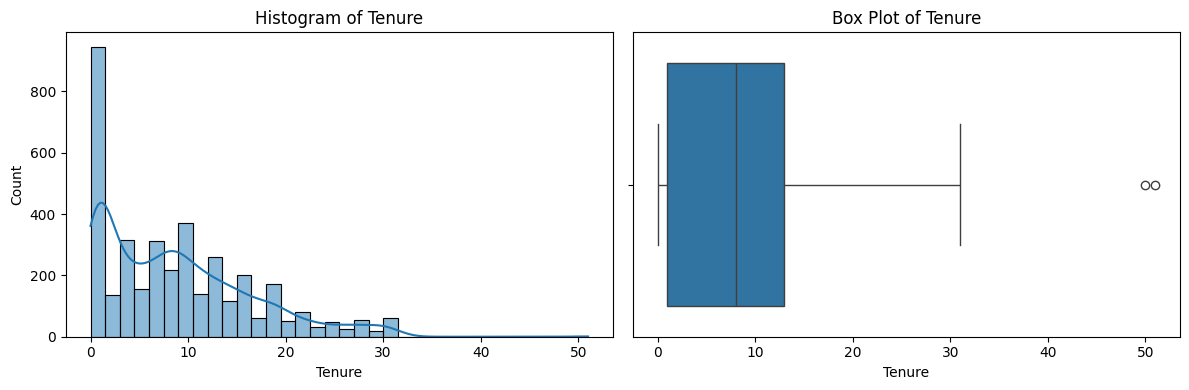

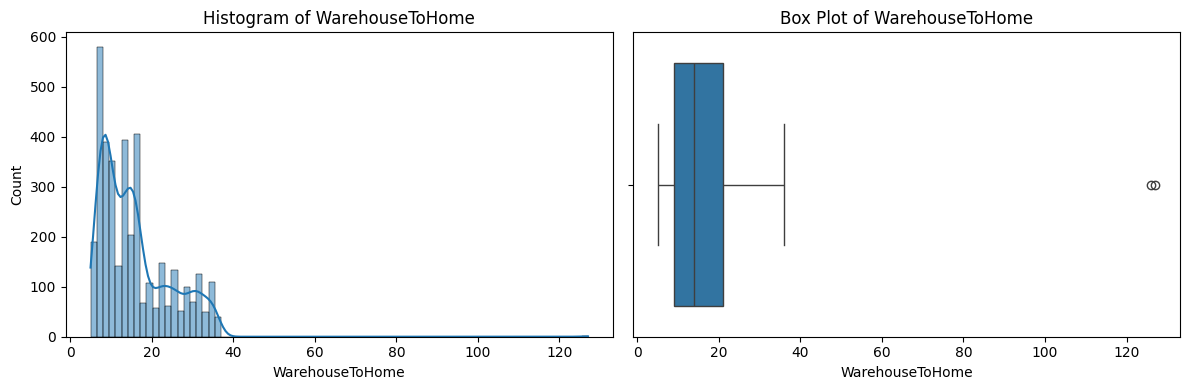

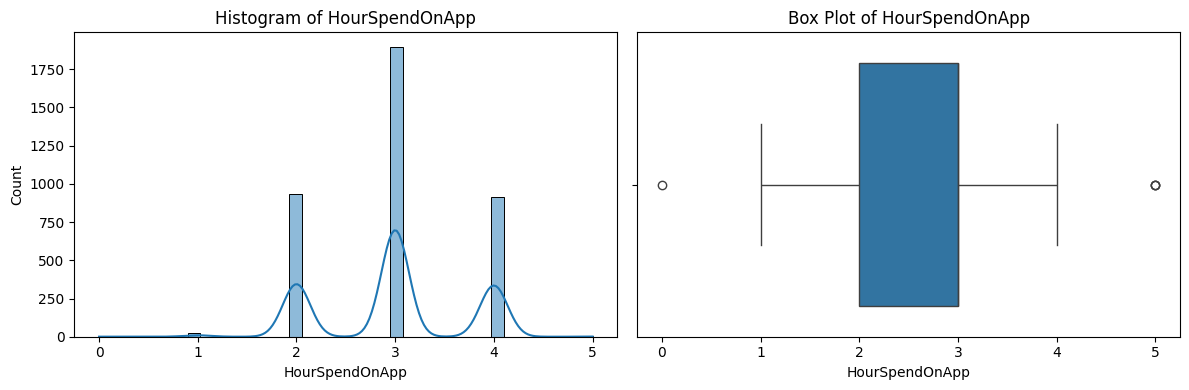

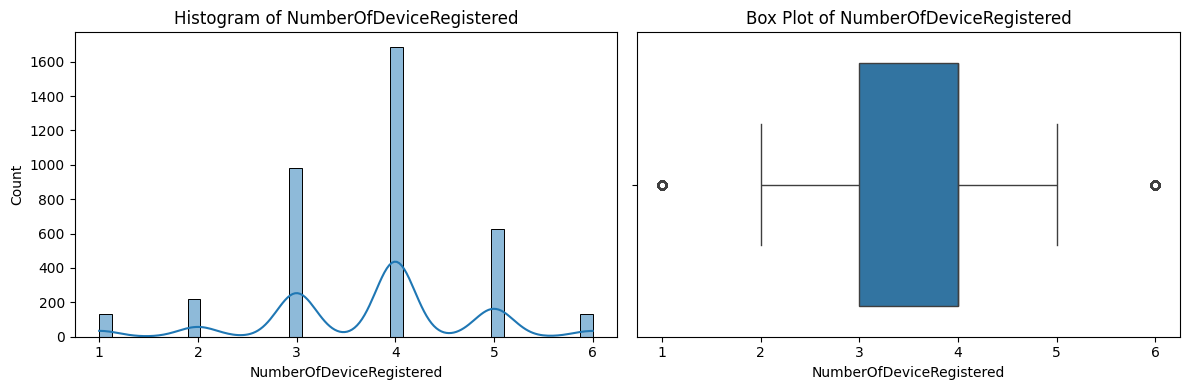

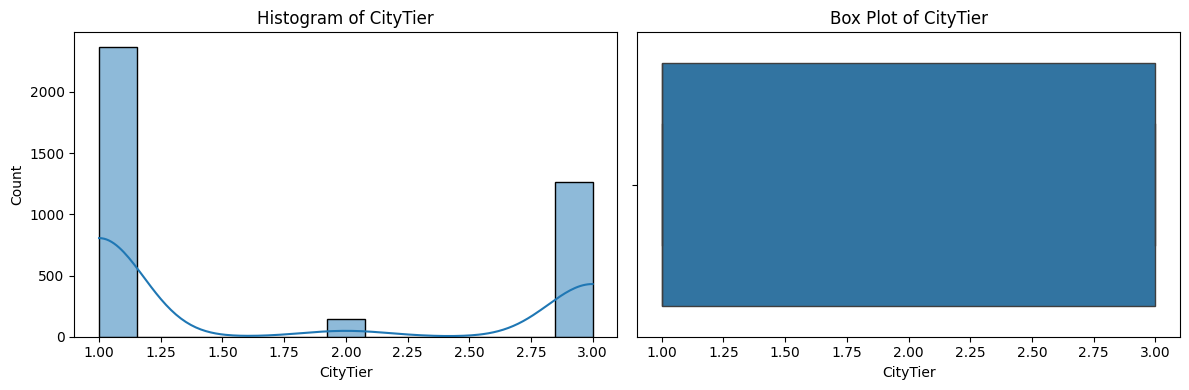

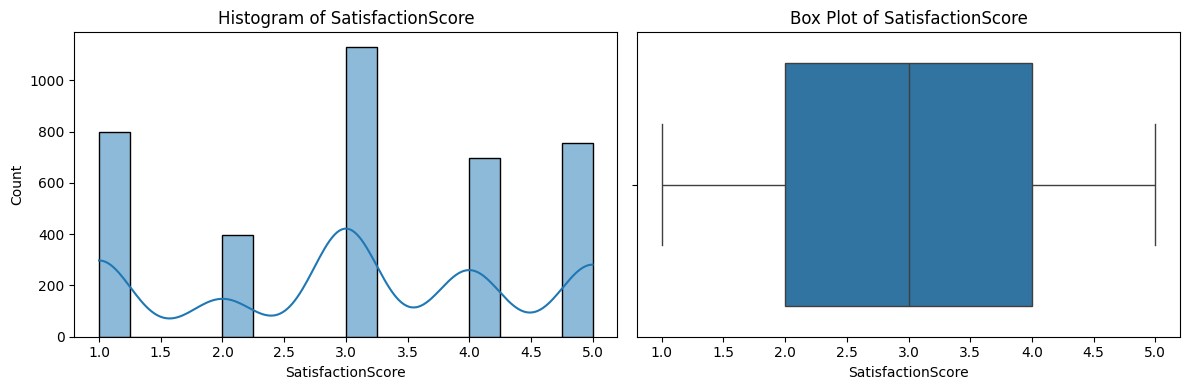

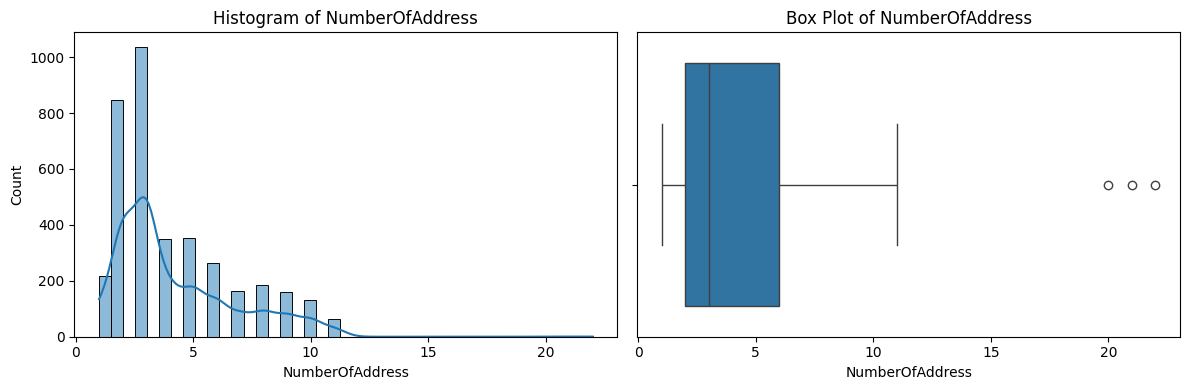

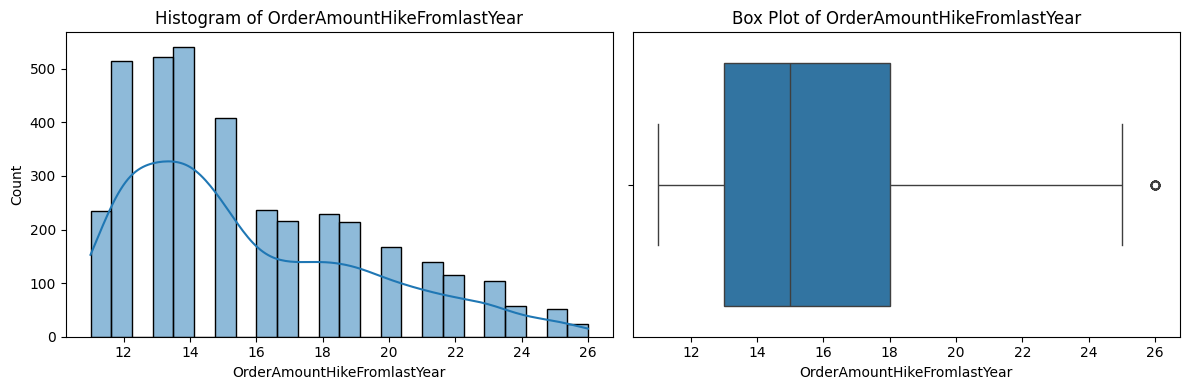

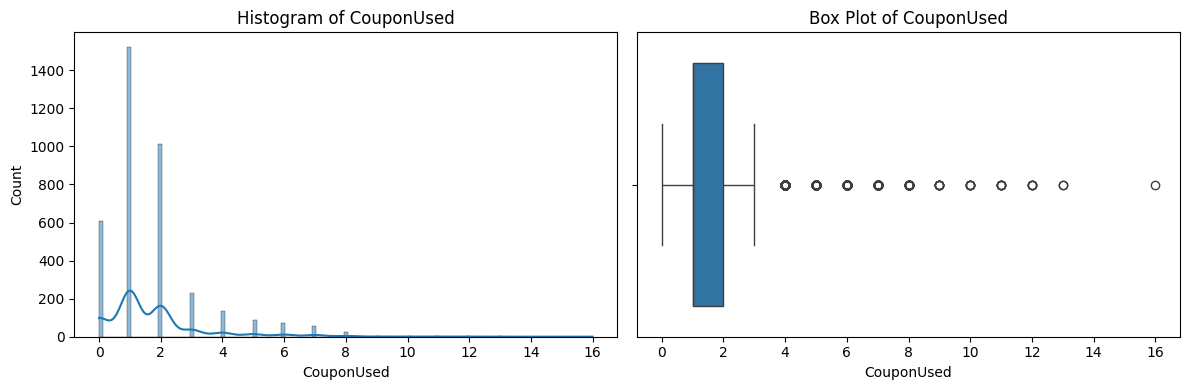

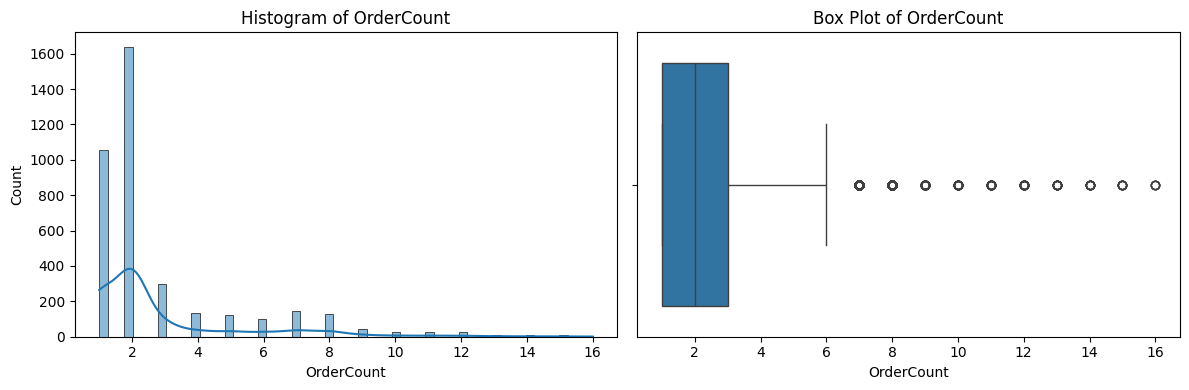

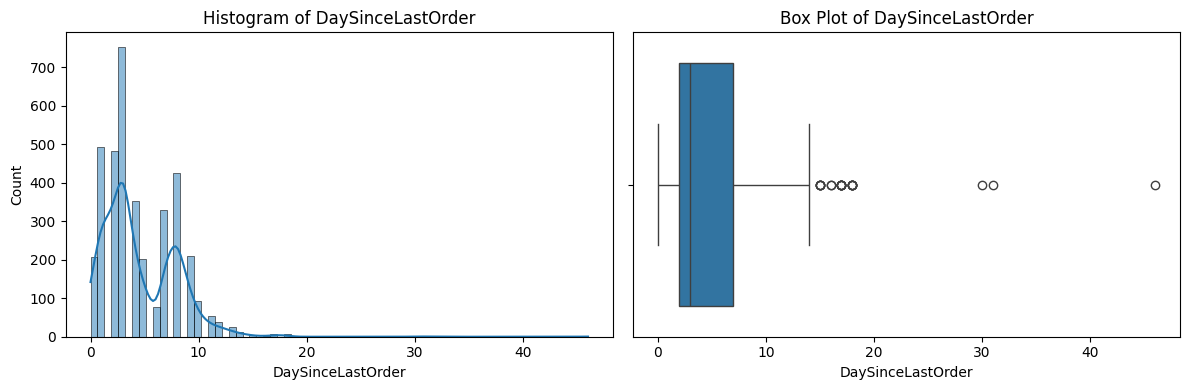

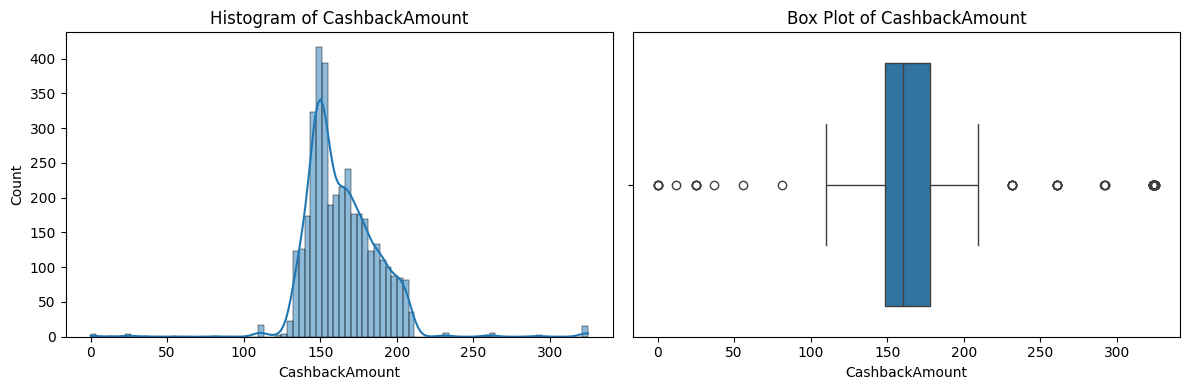

In [17]:
visualize_numerical_variables(df, numerical_vars)

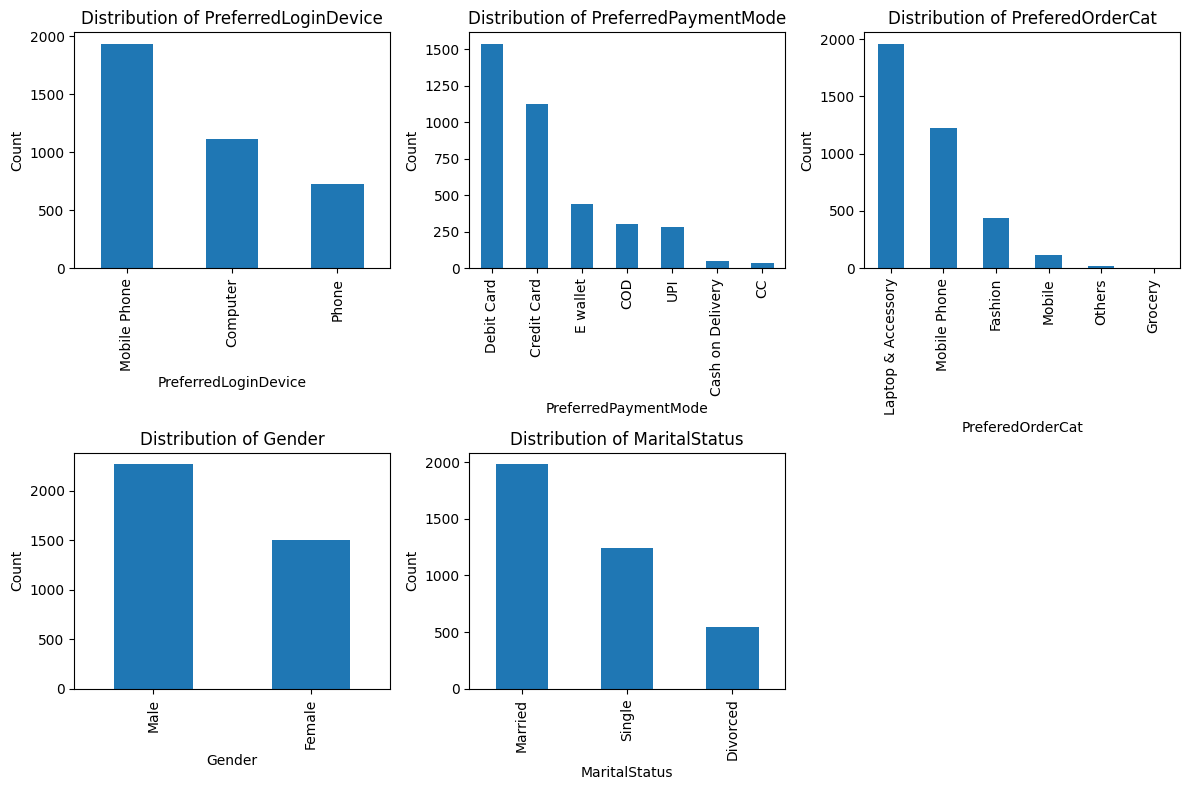

In [18]:
# Set up the plot grid
if len(categorical_vars) > 0:
    n_cols = 3
    n_rows = (len(categorical_vars) - 1) // n_cols + 1
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 8))

    # Iterate over the columns and create a bar chart for each one
    for i, column in enumerate(categorical_vars):
        row = i // n_cols
        col = i % n_cols
        df[column].value_counts().plot(kind='bar', ax=axs[row, col])
        axs[row, col].set_title('Distribution of {}'.format(column))
        axs[row, col].set_xlabel(column)
        axs[row, col].set_ylabel('Count')

    # Remove any unused subplots
    for i in range(len(categorical_vars), n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        fig.delaxes(axs[row, col])

    # Adjust the spacing and display the plot
    fig.tight_layout()
    plt.show()
else:
    print('Error: No columns to plot')

In [19]:
def remove_outliers(df, column_name):
    percentile = 99
    upper_threshold = np.percentile(df[column_name], percentile)
    df[column_name] = np.where(df[column_name] > upper_threshold, upper_threshold, df[column_name])
    return df

In [20]:
df.shape

(3774, 20)

In [21]:
df1 = remove_outliers(df, "Tenure")
df1 = remove_outliers(df1, "WarehouseToHome")
df1 = remove_outliers(df1, "HourSpendOnApp")
df1 = remove_outliers(df1, "OrderAmountHikeFromlastYear")
df1 = remove_outliers(df1, "CouponUsed")
df1 = remove_outliers(df1, "CashbackAmount")

C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_12272\263480331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = np.where(df[column_name] > upper_threshold, upper_threshold, df[column_name])


In [22]:
df1.shape

(3774, 20)

### Calculating the IV value for the variables to find importance of variables or relevance

In [23]:
def calculate_woe_iv(df, var_name, target_name, bin_type='equal_width', num_bins=10):
    """
    Calculates the Weight of Evidence (WOE) and Information Value (IV) for a given variable in a dataframe.

    Args:
        df (pd.DataFrame): The dataframe containing the variable and target.
        var_name (str): The name of the variable to calculate WOE and IV for.
        target_name (str): The name of the binary target variable.
        bin_type (str, optional): The type of binning to use. Options are 'equal_width' for continuous variables 
                                   and 'frequency' for categorical variables. Defaults to 'equal_width'.
        num_bins (int, optional): The number of bins to use for continuous variables. Ignored for categorical variables.
                                  Defaults to 10.

    Returns:
        float: The IV value for the variable.
        pd.DataFrame: A dataframe containing the WOE and IV values for each bin/category of the variable.
    """

    # create a copy of the dataframe to avoid modifying the original data
    df_new = df.copy()

    # calculate the total number of good and bad observations
    total_good = df_new[target_name].sum()
    total_bad = df_new.shape[0] - total_good

    if bin_type == 'equal_width':  # for continuous variables
        # bin the variable into num_bins equal width bins
        _, bins = pd.cut(df_new[var_name], bins=num_bins, retbins=True, duplicates='drop')

        # create a new column with the bin labels
        df_new['bin'] = pd.cut(df_new[var_name], bins=bins, labels=False)

    elif bin_type == 'frequency':  # for categorical variables
        # create a new column with the bin labels
        df_new['bin'] = df_new[var_name]

    else:
        raise ValueError("bin_type should be 'equal_width' or 'frequency'.")

    # calculate the total number of observations in each bin/category
    bin_counts = df_new.groupby('bin')[target_name].agg(['count', 'sum'])
    bin_counts['pct_good'] = bin_counts['sum'] / total_good
    bin_counts['pct_bad'] = (bin_counts['count'] - bin_counts['sum']) / total_bad
    bin_counts['woe'] = np.log(bin_counts['pct_good'] / bin_counts['pct_bad'])
    bin_counts['iv'] = (bin_counts['pct_good'] - bin_counts['pct_bad']) * bin_counts['woe']
    bin_counts['lowers']=bins[:-1]
    bin_counts['uppers']=bins[1:]
    bin_counts['TAR'] = bin_counts['sum'] / bin_counts['count']

    iv = bin_counts['iv'].sum()

    # return the IV and bin_counts dataframe
    return iv, bin_counts[['TAR','pct_good','pct_bad','woe', 'iv','lowers','uppers']]

In [24]:
iv1, woe_df1 = calculate_woe_iv(df, "Tenure", "Churn", bin_type='equal_width', num_bins=3)
woe_df1["Var_name"]="Tenure"
woe_df1["IV_sum"]=iv1
woe_df1

,TAR,pct_good,pct_bad,woe,iv,lowers,uppers,Var_name,IV_sum
bin,,,,,,,,,
0,0.228886,0.889065,0.601336,0.391016,0.112507,-0.03,10.0,Tenure,0.576202
1,0.065868,0.104596,0.297805,-1.046334,0.202161,10.00,20.0,Tenure,0.576202
2,0.012461,0.006339,0.100859,-2.766980,0.261535,20.00,30.0,Tenure,0.576202


In [25]:

iv2, woe_df2 = calculate_woe_iv(df, "WarehouseToHome", "Churn", bin_type='equal_width', num_bins=8)
woe_df2["Var_name"]="WarehouseToHome"
woe_df2["IV_sum"]=iv2
woe_df2

,TAR,pct_good,pct_bad,woe,iv,lowers,uppers,Var_name,IV_sum
bin,,,,,,,,,
0,0.117035,0.142631,0.216036,-0.415184,0.030477,4.969,8.875,WarehouseToHome,0.09357
1,0.154020,0.215531,0.237671,-0.097783,0.002165,8.875,12.750,WarehouseToHome,0.09357
2,0.161329,0.215531,0.224944,-0.042749,0.000402,12.750,16.625,WarehouseToHome,0.09357
3,0.191617,0.101426,0.085905,0.166088,0.002578,16.625,20.500,WarehouseToHome,0.09357
4,0.203008,0.085578,0.067451,0.238025,0.004315,20.500,24.375,WarehouseToHome,0.09357
5,0.154506,0.057052,0.062679,-0.094058,0.000529,24.375,28.250,WarehouseToHome,0.09357
6,0.304878,0.118859,0.054407,0.781452,0.050366,28.250,32.125,WarehouseToHome,0.09357
7,0.200000,0.063391,0.050907,0.219333,0.002738,32.125,36.000,WarehouseToHome,0.09357


In [26]:
iv3, woe_df3 = calculate_woe_iv(df, "NumberOfAddress", "Churn", bin_type='equal_width', num_bins=3)
woe_df3["Var_name"]="NumberOfAddress"
woe_df3["IV_sum"]=iv3
woe_df3

,TAR,pct_good,pct_bad,woe,iv,lowers,uppers,Var_name,IV_sum
bin,,,,,,,,,
0,0.162471,0.879556,0.910277,-0.034331,0.001055,0.979,8.0,NumberOfAddress,0.010504
1,0.211268,0.118859,0.089087,0.288326,0.008584,8.000,15.0,NumberOfAddress,0.010504
2,0.333333,0.001585,0.000636,0.912480,0.000865,15.000,22.0,NumberOfAddress,0.010504


In [27]:
iv4, woe_df4 = calculate_woe_iv(df, "OrderAmountHikeFromlastYear", "Churn", bin_type='equal_width', num_bins=5)
woe_df4["Var_name"]="OrderAmountHikeFromlastYear"
woe_df4["IV_sum"]=iv4
woe_df4

,TAR,pct_good,pct_bad,woe,iv,lowers,uppers,Var_name,IV_sum
bin,,,,,,,,,
0,0.166798,0.335975,0.336939,-0.002867,0.000003,10.986,13.8,OrderAmountHikeFromlastYear,0.022162
1,0.163713,0.307448,0.315304,-0.025229,0.000198,13.800,16.6,OrderAmountHikeFromlastYear,0.022162
2,0.163885,0.171157,0.175310,-0.023976,0.000100,16.600,19.4,OrderAmountHikeFromlastYear,0.022162
3,0.139480,0.093502,0.115813,-0.213989,0.004774,19.400,22.2,OrderAmountHikeFromlastYear,0.022162
4,0.245763,0.091918,0.056634,0.484287,0.017087,22.200,25.0,OrderAmountHikeFromlastYear,0.022162


In [28]:
iv5, woe_df5 = calculate_woe_iv(df, "DaySinceLastOrder", "Churn", bin_type='equal_width', num_bins=3)
woe_df5["Var_name"]="DaySinceLastOrder"
woe_df5["IV_sum"]=iv5
woe_df5

c:\Sumit\Data Science Projects\E Commerce Churn\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,TAR,pct_good,pct_bad,woe,iv,lowers,uppers,Var_name,IV_sum
bin,,,,,,,,,
0,0.167732,0.998415,0.994591,0.003837,0.000015,-0.046000,15.333333,DaySinceLastOrder,inf
1,0.000000,0.000000,0.005091,-inf,inf,15.333333,30.666667,DaySinceLastOrder,inf
2,0.500000,0.001585,0.000318,1.605627,0.002034,30.666667,46.000000,DaySinceLastOrder,inf


In [29]:
iv6, woe_df6 = calculate_woe_iv(df, "CashbackAmount", "Churn", bin_type='equal_width', num_bins=4)
woe_df6["Var_name"]="CashbackAmount"
woe_df6["IV_sum"]=iv6
woe_df6

c:\Sumit\Data Science Projects\E Commerce Churn\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,TAR,pct_good,pct_bad,woe,iv,lowers,uppers,Var_name,IV_sum
bin,,,,,,,,,
0,0.000000,0.000000,0.003182,-inf,inf,-0.208854,52.213575,CashbackAmount,inf
1,0.000000,0.000000,0.000636,-inf,inf,52.213575,104.427150,CashbackAmount,inf
2,0.211744,0.565769,0.422844,0.291181,0.041617,104.427150,156.640725,CashbackAmount,inf
3,0.131985,0.434231,0.573338,-0.277897,0.038657,156.640725,208.854300,CashbackAmount,inf


In [30]:
woe_concat = pd.concat([woe_df1,woe_df2,woe_df3,woe_df4,woe_df5,woe_df6], axis=0)
woe_concat

,TAR,pct_good,pct_bad,woe,iv,lowers,uppers,Var_name,IV_sum
bin,,,,,,,,,
0,0.228886,0.889065,0.601336,0.391016,0.112507,-0.030000,10.000000,Tenure,0.576202
1,0.065868,0.104596,0.297805,-1.046334,0.202161,10.000000,20.000000,Tenure,0.576202
2,0.012461,0.006339,0.100859,-2.766980,0.261535,20.000000,30.000000,Tenure,0.576202
0,0.117035,0.142631,0.216036,-0.415184,0.030477,4.969000,8.875000,WarehouseToHome,0.093570
1,0.154020,0.215531,0.237671,-0.097783,0.002165,8.875000,12.750000,WarehouseToHome,0.093570
2,0.161329,0.215531,0.224944,-0.042749,0.000402,12.750000,16.625000,WarehouseToHome,0.093570
3,0.191617,0.101426,0.085905,0.166088,0.002578,16.625000,20.500000,WarehouseToHome,0.093570
4,0.203008,0.085578,0.067451,0.238025,0.004315,20.500000,24.375000,WarehouseToHome,0.093570
5,0.154506,0.057052,0.062679,-0.094058,0.000529,24.375000,28.250000,WarehouseToHome,0.093570


In [31]:
with pd.ExcelWriter('output.xlsx') as writer:
    summary_1.to_excel(writer, sheet_name='WOE_encoding_analysis')
    woe_concat.to_excel(writer, sheet_name='Categorical_var_analysis')

In [32]:
# Define a function to calculate the WoE and IV
def calc_iv(df, var_name, target_name):
    """
    df: pandas DataFrame containing the data
    var_name: name of the categorical variable to calculate IV for
    target_name: name of the target variable (binary)
    """
    # Group the data by the categories of the variable
    grouped = df.groupby(var_name)[target_name].agg(['count', 'sum'])

    # Calculate the proportion of events and non-events in each category
    grouped['event_rate'] = grouped['sum'] / grouped['count']
    grouped['non_event_rate'] = (grouped['count'] - grouped['sum']) / grouped['count']

    # Calculate the WoE for each category
    grouped['woe'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])

    # Calculate the IV for the variable
    iv = sum((grouped['event_rate'] - grouped['non_event_rate']) * grouped['woe'])
    return iv

In [33]:
iv = calc_iv(df, 'Gender', 'Churn')
print("IV:",'Gender', iv)
iv = calc_iv(df, 'MaritalStatus', 'Churn')
print("IV:",'MaritalStatus', iv)
iv = calc_iv(df, 'Complain', 'Churn')
print("IV:",'Complain', iv)
iv = calc_iv(df, 'PreferredLoginDevice', 'Churn')
print("IV:",'PreferredLoginDevice', iv)
iv = calc_iv(df, 'PreferredPaymentMode', 'Churn')
print("IV:",'PreferredPaymentMode', iv)
iv = calc_iv(df, 'PreferedOrderCat', 'Churn')
print("IV:",'PreferedOrderCat', iv)

IV: Gender 2.1884747475381783
IV: MaritalStatus 3.281565166415505
IV: Complain 1.9206125756938062
IV: PreferredLoginDevice 2.9982018086145104
IV: PreferredPaymentMode 6.474656522259947
IV: PreferedOrderCat inf


c:\Sumit\Data Science Projects\E Commerce Churn\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [48]:
def calculate_categorical_iv(dataframe, feature, target):
    # Create a DataFrame with the feature and target variable
    data = pd.DataFrame({feature: dataframe[feature], 'target': dataframe[target]})
    
    # Calculate WoE and IV for each category
    iv_df = pd.DataFrame(index=data[feature].unique())
    iv_df.index.name = feature
    iv_df['events'] = data.groupby(feature)['target'].sum()
    iv_df['non_events'] = data.groupby(feature)['target'].count() - iv_df['events']
    iv_df['proportion_events'] = iv_df['events'] / iv_df['events'].sum()
    iv_df['proportion_non_events'] = iv_df['non_events'] / iv_df['non_events'].sum()
    iv_df['woe'] = np.log(iv_df['proportion_non_events'] / iv_df['proportion_events'])
    iv_df['iv'] = (iv_df['proportion_non_events'] - iv_df['proportion_events']) * iv_df['woe']
    
    # Sum up the IV values for each category
    total_iv = iv_df['iv'].sum()

    return total_iv, iv_df

In [50]:
iv_value_gender, iv_df_gender = calculate_categorical_iv(df, 'Gender', 'Churn')
print("IV Value for Gender:", iv_value_gender)
print("IV Details for Gender:")
print(iv_df_gender)

IV Value for Gender: 0.008319761765296576
IV Details for Gender:
        events  non_events  proportion_events  proportion_non_events  \
Gender                                                                 
Female     228        1275           0.361331               0.405663   
Male       403        1868           0.638669               0.594337   

             woe        iv  
Gender                      
Female  0.115729  0.005131  
Male   -0.071940  0.003189  


In [51]:
iv_value_MaritalStatus, iv_df_MaritalStatus = calculate_categorical_iv(df, 'MaritalStatus', 'Churn')
print("IV Value for MaritalStatus:", iv_value_MaritalStatus)
print("IV Details for MaritalStatus:")
print(iv_df_MaritalStatus)

IV Value for MaritalStatus: 0.23341200148071856
IV Details for MaritalStatus:
               events  non_events  proportion_events  proportion_non_events  \
MaritalStatus                                                                 
Single            327         918           0.518225               0.292078   
Divorced           85         462           0.134707               0.146993   
Married           219        1763           0.347068               0.560929   

                    woe        iv  
MaritalStatus                      
Single        -0.573390  0.129671  
Divorced       0.087286  0.001072  
Married        0.480073  0.102669  


In [53]:
iv_value_Complain, iv_df_Complain = calculate_categorical_iv(df, 'Complain', 'Churn')
print("IV Value for Complain:", iv_value_Complain)
print("IV Details for Complain:")
print(iv_df_Complain)

IV Value for Complain: 0.3649280199155246
IV Details for Complain:
          events  non_events  proportion_events  proportion_non_events  \
Complain                                                                 
1            329         736           0.521395               0.234171   
0            302        2407           0.478605               0.765829   

               woe        iv  
Complain                      
1        -0.800455  0.229909  
0         0.470082  0.135019  


In [54]:
iv_value_PreferredLoginDevice, iv_df_PreferredLoginDevice  = calculate_categorical_iv(df, 'PreferredLoginDevice', 'Churn')
print("IV Value for PreferredLoginDevice :", iv_value_PreferredLoginDevice)
print("IV Details for PreferredLoginDevice :")
print(iv_df_PreferredLoginDevice)

IV Value for PreferredLoginDevice : 0.046597093280495876
IV Details for PreferredLoginDevice :
                      events  non_events  proportion_events  \
PreferredLoginDevice                                          
Mobile Phone             268        1668           0.424723   
Phone                    151         576           0.239303   
Computer                 212         899           0.335975   

                      proportion_non_events       woe        iv  
PreferredLoginDevice                                             
Mobile Phone                       0.530703  0.222766  0.023609  
Phone                              0.183264 -0.266799  0.014951  
Computer                           0.286032 -0.160930  0.008037  


In [55]:
iv_value_PreferredPaymentMode, iv_df_PreferredPaymentMode  = calculate_categorical_iv(df, 'PreferredPaymentMode', 'Churn')
print("IV Value for PreferredPaymentMode:", iv_value_PreferredPaymentMode)
print("IV Details for PreferredPaymentMode:")
print(iv_df_PreferredPaymentMode)

IV Value for PreferredPaymentMode: 0.0484406029537437
IV Details for PreferredPaymentMode:
                      events  non_events  proportion_events  \
PreferredPaymentMode                                          
Debit Card               230        1308           0.364501   
COD                       73         228           0.115689   
CC                        10          25           0.015848   
Credit Card              169         955           0.267829   
E wallet                  94         349           0.148970   
UPI                       48         237           0.076070   
Cash on Delivery           7          41           0.011094   

                      proportion_non_events       woe        iv  
PreferredPaymentMode                                             
Debit Card                         0.416163  0.132548  0.006848  
COD                                0.072542 -0.466741  0.020139  
CC                                 0.007954 -0.689336  0.005441  
Credit Card

In [56]:
iv_value_PreferedOrderCat, iv_df_PreferedOrderCat  = calculate_categorical_iv(df, 'PreferedOrderCat', 'Churn')
print("IV Value for PreferedOrderCat:", iv_value_PreferedOrderCat)
print("IV Details for PreferedOrderCat:")
print(iv_df_PreferedOrderCat)


IV Value for PreferedOrderCat: inf
IV Details for PreferedOrderCat:
                    events  non_events  proportion_events  \
PreferedOrderCat                                            
Laptop & Accessory     198        1763           0.313788   
Mobile Phone           325         902           0.515055   
Fashion                 80         363           0.126783   
Mobile                  24          95           0.038035   
Others                   4          14           0.006339   
Grocery                  0           6           0.000000   

                    proportion_non_events       woe        iv  
PreferedOrderCat                                               
Laptop & Accessory               0.560929  0.580878  0.143559  
Mobile Phone                     0.286987 -0.584838  0.133383  
Fashion                          0.115495 -0.093251  0.001053  
Mobile                           0.030226 -0.229804  0.001795  
Others                           0.004454 -0.352864  0.0006

In [57]:
def create_binned_variable(df, column_name, num_bins):
    # Compute bin edges
    bin_edges = pd.qcut(df[column_name], q=num_bins, duplicates='drop').value_counts().sort_index().index
    
    # Create bin labels
    bin_labels = [f'Decile{i}' for i in range(1, num_bins+1)]
    print(bin_labels)
    print(bin_edges)
    # Create binned variable
    df[column_name + '_binned'] = pd.cut(df[column_name], bins=[edge.left for edge in bin_edges]+[bin_edges[-1].right], labels=bin_labels)

In [58]:
create_binned_variable(df,"Tenure",3)
create_binned_variable(df,"WarehouseToHome",8)

['Decile1', 'Decile2', 'Decile3']
CategoricalIndex([(-0.001, 4.0], (4.0, 11.0], (11.0, 30.0]], categories=[(-0.001, 4.0], (4.0, 11.0], (11.0, 30.0]], ordered=True, dtype='category', name='Tenure')
['Decile1', 'Decile2', 'Decile3', 'Decile4', 'Decile5', 'Decile6', 'Decile7', 'Decile8']
CategoricalIndex([(4.999, 7.0],   (7.0, 9.0],  (9.0, 11.0], (11.0, 14.0],
                  (14.0, 16.0], (16.0, 21.0], (21.0, 28.0], (28.0, 36.0]],
                 categories=[(4.999, 7.0], (7.0, 9.0], (9.0, 11.0], (11.0, 14.0], (14.0, 16.0], (16.0, 21.0], (21.0, 28.0], (28.0, 36.0]], ordered=True, dtype='category', name='WarehouseToHome')


C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_12272\494972877.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '_binned'] = pd.cut(df[column_name], bins=[edge.left for edge in bin_edges]+[bin_edges[-1].right], labels=bin_labels)
C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_12272\494972877.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + '_binned'] = pd.cut(df[column_name], bins=[edge.left for edge in bin_edges]+[bin_edges[-1].right], labels=bin_labels

In [59]:
def create_woe_encoded_variable(df, binned_column, target_column):
    # Calculate the total count of positive and negative cases for each bin
    bin_counts = df.groupby(binned_column)[target_column].value_counts().unstack().fillna(0)
    
    # Calculate the total count of positive and negative cases for the entire dataset
    total_positives = bin_counts.sum(axis=0)[1]
    total_negatives = bin_counts.sum(axis=0)[0]
    
    # Calculate the percentage of positive and negative cases for each bin
    bin_counts['Percentage_Positive'] = bin_counts[1] / total_positives
    bin_counts['Percentage_Negative'] = bin_counts[0] / total_negatives
    
    # Calculate the Weight of Evidence (WOE) for each bin
    bin_counts['WOE'] = np.log(bin_counts['Percentage_Positive'] / bin_counts['Percentage_Negative'])
    
    # Create a dictionary mapping the binned values to their respective WOE values
    woe_mapping = bin_counts['WOE'].to_dict()
    
    # Create the WOE encoded variable based on the binned column
    df[binned_column + '_WOE'] = df[binned_column].map(woe_mapping)

In [60]:
create_woe_encoded_variable(df,"Tenure_binned",target)
create_woe_encoded_variable(df,"WarehouseToHome_binned",target)

C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_12272\1528033531.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df.groupby(binned_column)[target_column].value_counts().unstack().fillna(0)
C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_12272\1528033531.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[binned_column + '_WOE'] = df[binned_column].map(woe_mapping)
C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_12272\1528033531.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in 

In [61]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Tenure_binned,WarehouseToHome_binned,Tenure_binned_WOE,WarehouseToHome_binned_WOE
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,1,11.0,1.0,1.0,5.0,159.93,Decile1,Decile1,1.069872,-0.311777
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,0,23.0,0.0,1.0,3.0,134.07,Decile1,Decile5,1.069872,0.136547
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,...,1,22.0,4.0,6.0,7.0,139.19,Decile1,Decile7,1.069872,0.033727
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,...,1,13.0,0.0,1.0,0.0,153.81,Decile2,Decile1,-1.526383,-0.311777
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,...,1,13.0,2.0,2.0,2.0,134.41,Decile1,Decile3,1.069872,-0.059381


In [63]:
df['Gender_dum'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Complain_dum'] = df['Complain']

C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_12272\1622500764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender_dum'] = df['Gender'].map({'Male': 1, 'Female': 0})
C:\Users\sumit.bu.gupta\AppData\Local\Temp\ipykernel_12272\1622500764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Complain_dum'] = df['Complain']


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [66]:
X = df[['Gender_dum','Complain_dum',
        'Tenure_binned_WOE','WarehouseToHome_binned_WOE']]

y = df[['Churn']]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Create a logistic regression model
logreg = LogisticRegression()

In [69]:
# Fit the model on the training data
logreg.fit(X_train, y_train)

c:\Sumit\Data Science Projects\E Commerce Churn\.venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [70]:
# Predict probabilities for the positive class
y_prob = logreg.predict_proba(X_test)[:, 1]
y_prob

array([0.23903411, 0.60330305, 0.03614147, 0.23035954, 0.0174349 ,
       0.11737383, 0.23367052, 0.20295837, 0.55301264, 0.08130509,
       0.66034473, 0.0400902 , 0.10799142, 0.23903411, 0.02712731,
       0.25732202, 0.55301264, 0.11022171, 0.02043081, 0.23903411,
       0.39185749, 0.02134637, 0.56034649, 0.02134637, 0.01711941,
       0.02369824, 0.52022508, 0.10654975, 0.10154922, 0.72332991,
       0.03431247, 0.02103412, 0.66034473, 0.02531659, 0.23903411,
       0.03674235, 0.02103412, 0.50816043, 0.02774002, 0.02774002,
       0.39185749, 0.03431247, 0.04221371, 0.02043081, 0.04221371,
       0.07669663, 0.23367052, 0.029626  , 0.02006222, 0.10799142,
       0.23035954, 0.0231508 , 0.05686346, 0.20598091, 0.0400902 ,
       0.02774002, 0.19654853, 0.52022508, 0.02103412, 0.1539154 ,
       0.0400902 , 0.35408408, 0.01711941, 0.19654853, 0.54841496,
       0.02855287, 0.60641472, 0.21088382, 0.02369824, 0.02712731,
       0.02043081, 0.02369824, 0.55301264, 0.13391164, 0.02855

In [71]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

In [72]:
# Calculate the Youden's J statistic (tpr - fpr) and find the optimal threshold
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

# Print the optimal threshold
print("Optimal Threshold:", optimal_threshold)

Optimal Threshold: 0.1320500631930362


In [73]:
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_prob)
print("AUC-ROC Score:", auc_roc)

AUC-ROC Score: 0.8327780662282219


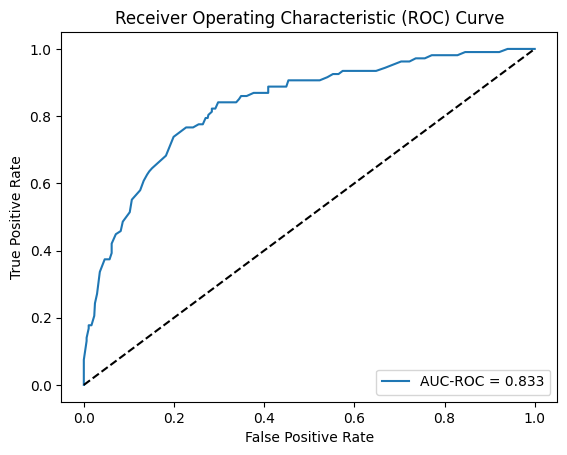

In [74]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [75]:
# Make predictions on the testing data
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [76]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8649006622516556


In [77]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       648
           1       0.53      0.42      0.47       107

    accuracy                           0.86       755
   macro avg       0.72      0.68      0.70       755
weighted avg       0.85      0.86      0.86       755

